In [1]:
# test data frame
# from dataframe_excel_charting import DataFrameExcelCharting
import pandas as pd
import numpy as np
import xlsxwriter

In [7]:
df = pd.DataFrame(np.random.randn(100, 4), columns=["col1", "col2", "col3", "col4"])
df["category"] = ["category{}".format(i) for i in range(100)]
df["col4"][0] = None
df["col4"][1] = np.inf
df["col5"] = df.apply(lambda x: [x["col1"], x["col2"]], axis = 1)
print df.head()

       col1      col2      col3      col4   category  \
0  1.250300 -1.831946  0.770629       NaN  category0   
1 -2.116022  0.155447  2.001984       inf  category1   
2 -0.291792  0.954175 -0.270300  0.461424  category2   
3  1.308511  0.589061 -0.597372  0.548737  category3   
4 -0.467733  0.209931 -2.223636  1.678988  category4   

                                col5  
0     [1.2502996905, -1.83194636187]  
1   [-2.11602156262, 0.155447283281]  
2  [-0.291792121019, 0.954175119894]  
3    [1.30851060859, 0.589060718251]  
4  [-0.467732528811, 0.209931241852]  


/Users/arthur/anaconda/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/arthur/anaconda/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
df = pd.DataFrame({
    'A': [['a', 'b', 'c'], ['A', 'B', 'C']]
    })

In [17]:
df["A"].to_string

<bound method Series.to_string of 0    [a, b, c]
1    [A, B, C]
Name: A, dtype: object>

In [5]:
workbook = xlsxwriter.Workbook("test_charting.xlsx")
test_class = DataFrameExcelCharting(df, workbook)
test_class.writeToExcel("test_sheet")
test_class.topNChart(columns=["col1", "col3"], n=10, category_col="category")
test_class.bucketsNChart(column="col4",n_buckets=10)
test_class.getBucketsCounts(column="col4", n_buckets=10)
test_class.closeWorkBook()

In [6]:
# list of DFs
df1 = pd.DataFrame(np.random.randn(100, 4), columns=["col1", "col2", "col3", "col4"])
df1["category"] = ["category{}".format(i) for i in range(100)]
df2 = pd.DataFrame(np.random.randn(100, 4), columns=["col5", "col6", "col7", "col8"])
df2["cate"] = ["cate{}".format(i) for i in range(100)]
print df1.head()
print df2.head()

       col1      col2      col3      col4   category
0 -0.108237  2.116755 -1.177859 -1.167523  category0
1  0.526545 -0.415420 -0.542660  0.384540  category1
2  1.381104  1.388207  0.825058 -0.299769  category2
3 -1.695084  1.033844 -1.435455  1.576350  category3
4 -0.572219 -0.440056 -0.391426 -0.922716  category4
       col5      col6      col7      col8   cate
0 -1.702405 -1.927831 -0.380204 -2.318844  cate0
1 -1.413312  0.918250 -1.936924 -0.566692  cate1
2 -0.637312 -1.271255  0.683931 -0.540982  cate2
3 -0.278463  1.517297  0.455493  1.363902  cate3
4 -0.219471  1.483166  0.597910  0.067171  cate4


In [7]:
# list of DFs
dfs = [df1, df2]
workbook = xlsxwriter.Workbook("huge_workbook.xlsx")
i = 1
for df in dfs:
    test_class = DataFrameExcelCharting(df, workbook)
    test_class.writeToExcel("test_sheet{0}".format(i))
    i = i + 1
workbook.close()

In [2]:
expected_metrics_by_node_df = pd.DataFrame(
                                           columns=[
                                                    "Settlement_ID",
                                                    "Network_ID",
                                                    "Node_ID",
                                                    "lat",
                                                    "lon",
                                                    "Marginal_Population_Served",
                                                    "Population_Served",
                                                    "Marginal_Total_Demand",
                                                    "Total_Demand",
                                                    "Total_Transit",
                                                    "Tower_Cost",
                                                    "Radio_Cost",
                                                    "Power_Cost",
                                                    "Hop_Count",
                                                    "Single_Site_Failure_Effect",
                                                    "Node_Utility",
                                                    ]
                                           )
expected_metrics_by_node_df.loc[len(expected_metrics_by_node_df)] = [
                                                                    "PER_5_216:1",
                                                                    "lat_-15.092711061872_lon_-73.745867783712",
                                                                     "F1",
                                                                     -15.092711061872,
                                                                     -73.745867783712,
                                                                     0.0,
                                                                     0.0,
                                                                     0.0,
                                                                     0.0,
                                                                     26608.5,
                                                                     15000.0,
                                                                     2500.0,
                                                                     10000.0,
                                                                     np.nan,
                                                                     26608.5,
                                                                     np.nan,
                                                                     ]
expected_metrics_by_node_df.loc[len(expected_metrics_by_node_df)] = [
                                                                    "PER_5_216:1",
                                                                    "lat_-15.092711061872_lon_-73.745867783712",
                                                                     "N1",
                                                                     -15.090779,
                                                                     -73.720231,
                                                                     10000.0,
                                                                     10000.0,
                                                                     17739.0,
                                                                     17739.0,
                                                                     26608.5,
                                                                     11000.0,
                                                                     57300.0,
                                                                     10000.0,
                                                                     1.0,
                                                                     26608.5,
                                                                     1.0,
                                                                     ]
expected_metrics_by_node_df.loc[len(expected_metrics_by_node_df)] = [
                                                                    "PER_5_216:1",
                                                                    "lat_-15.092711061872_lon_-73.745867783712",
                                                                    "N2",
                                                                    -15.113981,
                                                                    -73.723150,
                                                                    4000.0,
                                                                    4000.0,
                                                                    5913.0,
                                                                    5913.0,
                                                                    5913.0,
                                                                    15000.0,
                                                                    24800.0,
                                                                    10000.0,
                                                                    2.0,
                                                                    5913.0,
                                                                    1.0,
                                                                    ]
expected_metrics_by_node_df.loc[len(expected_metrics_by_node_df)] = [
                                                                    "PER_5_216:1",
                                                                    "lat_-15.092711061872_lon_-73.745867783712",
                                                                    "N3",
                                                                    -15.121024,
                                                                    -73.682895,
                                                                    2000.0,
                                                                    2000.0,
                                                                    2956.5,
                                                                    2956.5,
                                                                    2956.5,
                                                                    28000.0,
                                                                    24800.0,
                                                                    10000.0,
                                                                    2.0,
                                                                    2956.5,
                                                                    1.0,
                                                                    ]
expected_metrics_by_node_df.loc[len(expected_metrics_by_node_df)] = [
                                                                    "PER_5_121:1",
                                                                    "lat_-15.05366466651_lon_-73.770922082143",
                                                                    "F2",
                                                                    -15.05366466651,
                                                                    -73.770922082143,
                                                                    0.0,
                                                                    0.0,
                                                                    0.0,
                                                                    0.0,
                                                                    2217.375,
                                                                    28000.0,
                                                                    5000.0,
                                                                    10000.0,
                                                                    np.nan,
                                                                    2217.375,
                                                                    np.nan,
                                                                    ]
expected_metrics_by_node_df.loc[len(expected_metrics_by_node_df)] = [
                                                                    "PER_5_121:1",
                                                                    "lat_-15.05366466651_lon_-73.770922082143",
                                                                    "N4",
                                                                    -15.027052,
                                                                    -73.775133,
                                                                    1000.0,
                                                                    1000.0,
                                                                    1478.25,
                                                                    1478.25,
                                                                    1478.25,
                                                                    15000.0,
                                                                    24800.0,
                                                                    10000.0,
                                                                    1.0,
                                                                    1478.25,
                                                                    1.0,
                                                                    ]
expected_metrics_by_node_df.loc[len(expected_metrics_by_node_df)] = [
                                                                    "PER_5_121:1",
                                                                    "lat_-15.05366466651_lon_-73.770922082143",
                                                                    "N5",
                                                                    -15.006327,
                                                                    -73.759684,
                                                                    500.0,
                                                                    500.0,
                                                                    739.125,
                                                                    739.125,
                                                                    739.125,
                                                                    28000.0,
                                                                    24800.0,
                                                                    10000.0,
                                                                    1.0,
                                                                    739.125,
                                                                    1.0,
                                                                    ]

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

/Users/arthur/anaconda/envs/tensorflow/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/arthur/anaconda/envs/tensorflow/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


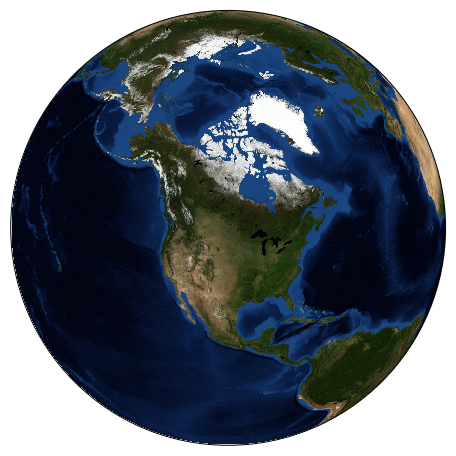

In [4]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [8]:
expected_metrics_by_node_df.head()

,Settlement_ID,Network_ID,Node_ID,lat,lon,Marginal_Population_Served,Population_Served,Marginal_Total_Demand,Total_Demand,Total_Transit,Tower_Cost,Radio_Cost,Power_Cost,Hop_Count,Single_Site_Failure_Effect,Node_Utility
0,PER_5_216:1,lat_-15.092711061872_lon_-73.745867783712,F1,-15.092711,-73.745868,0.0,0.0,0.0,0.0,26608.500,15000.0,2500.0,10000.0,NaN,26608.500,NaN
1,PER_5_216:1,lat_-15.092711061872_lon_-73.745867783712,N1,-15.090779,-73.720231,10000.0,10000.0,17739.0,17739.0,26608.500,11000.0,57300.0,10000.0,1.0,26608.500,1.0
2,PER_5_216:1,lat_-15.092711061872_lon_-73.745867783712,N2,-15.113981,-73.723150,4000.0,4000.0,5913.0,5913.0,5913.000,15000.0,24800.0,10000.0,2.0,5913.000,1.0
3,PER_5_216:1,lat_-15.092711061872_lon_-73.745867783712,N3,-15.121024,-73.682895,2000.0,2000.0,2956.5,2956.5,2956.500,28000.0,24800.0,10000.0,2.0,2956.500,1.0
4,PER_5_121:1,lat_-15.05366466651_lon_-73.770922082143,F2,-15.053665,-73.770922,0.0,0.0,0.0,0.0,2217.375,28000.0,5000.0,10000.0,NaN,2217.375,NaN


In [13]:
# import pandas as pd
cities = expected_metrics_by_node_df
# Extract the data we're interested in
lat = cities['lat'].values
lon = cities['lon'].values
population = cities['Total_Transit'].values
area = cities['Tower_Cost'].values

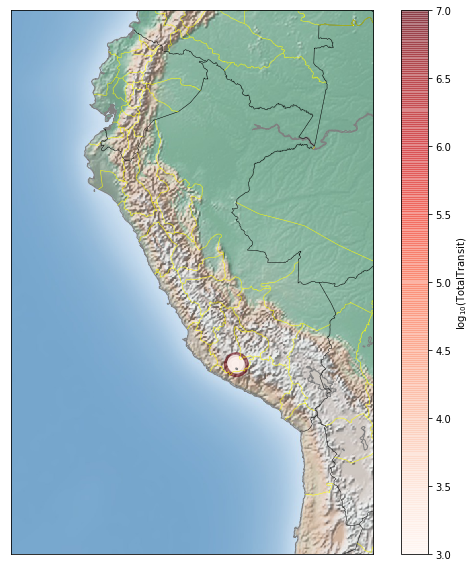

In [20]:
# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='lcc', resolution=None,
#             width=8E6, height=8E6, 
#             lat_0=45, lon_0=-100,)
# m.etopo(scale=0.5, alpha=0.5)

# # Map (long, lat) to (x, y) for plotting
# x, y = m(-122.3, 47.6)
# plt.plot(x, y, 'ok', markersize=5)
# plt.text(x, y, ' Seattle', fontsize=12);

fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=-11, lon_0=-76,
            width=2E6, height=3E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='black')
m.drawstates(color='yellow')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=population / 2000, s=area / 100,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm Total Transit})$')
plt.clim(3, 7)

# make legend with dummy points
# for a in [100, 300, 500]:
#     plt.scatter([], [], c='k', alpha=0.5, s=a,
#                 label=str(a) + ' km$^2$')
# plt.legend(scatterpoints=1, frameon=False,
#            labelspacing=1, loc='lower left');

# Map (long, lat) to (x, y) for plotting
# x, y = m(-73.759684, -15.006327)
# plt.plot(x, y, 'ok', markersize=5)
# plt.text(x, y, ' Seattle', fontsize=12);